In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from scipy.stats import chi2_contingency 
from sklearn.feature_selection import chi2, SelectKBest
# from xgboost import XGBClassifier
# from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Read the data

In [2]:
data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Apziva\\Project\\Happy Customers\\ACME-HappinessSurvey2020.csv')

# Data Exploration

In [3]:
data.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [5]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.shape

(126, 7)

### As the column is nosence, I assign every column the name

In [8]:
# rename the colunms
data.columns = ['Happy or Unhappy','on time','expected','ordered everything','paid a good price','satisfied','app easy']
data.head(5)

,Happy or Unhappy,on time,expected,ordered everything,paid a good price,satisfied,app easy
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [9]:
# check missing value
data.isnull().sum()

Happy or Unhappy      0
on time               0
expected              0
ordered everything    0
paid a good price     0
satisfied             0
app easy              0
dtype: int64

In [438]:
# every columns categorial statistic
data['on time'].value_counts()

5    65
4    40
3    20
1     1
Name: on time, dtype: int64

In [439]:
data['expected'].value_counts()

3    42
2    34
1    27
4    17
5     6
Name: expected, dtype: int64

In [440]:
data['ordered everything'].value_counts()

3    55
4    33
5    17
2    14
1     7
Name: ordered everything, dtype: int64

In [441]:
data['paid a good price'].value_counts()

4    53
3    41
5    25
2     5
1     2
Name: paid a good price, dtype: int64

In [442]:
data['satisfied'].value_counts()

4    50
5    31
3    22
2    16
1     7
Name: satisfied, dtype: int64

In [443]:
data['app easy'].value_counts()

5    57
4    47
3    20
2     1
1     1
Name: app easy, dtype: int64

### Let me do the statistic of each column has the number of different category 

# Data visualization

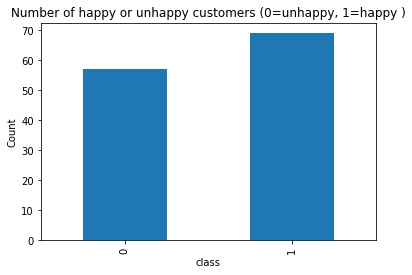

In [16]:
# check data balanced
plt.figure()
pd.Series(data['Happy or Unhappy']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of happy or unhappy customers (0=unhappy, 1=happy )');

### The data has the almost balanced data as the 0 class is a littler small than 1 class

In [17]:
# Features analysis
features = data.columns[1:].tolist()
print(features, len(features))

['on time', 'expected', 'ordered everything', 'paid a good price', 'satisfied', 'app easy'] 6


In [18]:
def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12620\2659944197.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


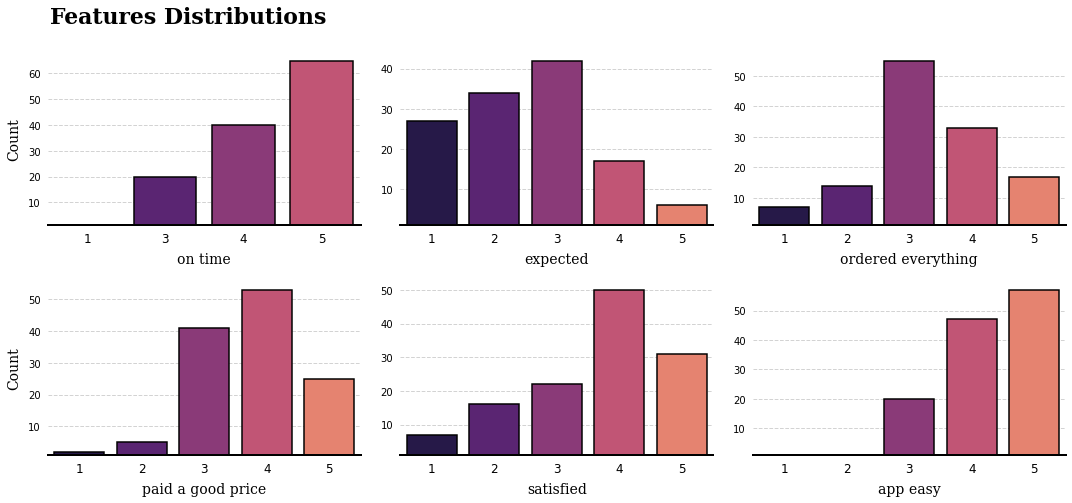

In [19]:
rows = 8
cols = 3
magma_palette = sns.color_palette("magma")
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=magma_palette, data=data, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold", fontfamily="serif")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

### This graph shows the distribution of all columns in data. 

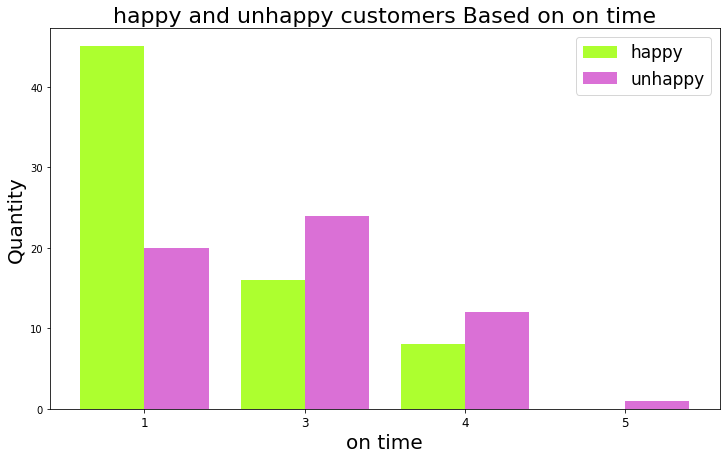

[45, 16, 8, 0]
[20, 24, 12, 1]


In [28]:
# happy and unhappy customers Based on on time
on_time = data['on time'].value_counts()
m_height = on_time.values.tolist() #Provides numerical values
on_time.axes
on_time_labels = on_time.axes[0].tolist()
ind = np.arange(4)
happy_cc = [] 
unhappy_cc = []    
for on_time in on_time_labels:
    size = len(data[data['on time'] == on_time].index)
    happy = len(data[(data['on time'] == on_time) & (data['Happy or Unhappy'] == 1)].index)
    happy_cc.append(happy)
    unhappy_cc.append(size-happy)
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
happy_bars = ax.bar(ind, happy_cc , width, color='#ADFF2F')
unhappy_bars = ax.bar(ind+width, unhappy_cc , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("on time",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('happy and unhappy customers Based on on time',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('1','3','4','5'),
                  fontsize = 12)
ax.legend((happy_bars,unhappy_bars),('happy','unhappy'),fontsize=17)
plt.show()
print(happy_cc)
print(unhappy_cc)                    


### I analysis the data based on 'on time' column. Happy customer lies most on 1 category in 'on time' cloumn and unhappy customer lies most on 3 category. There is no 2 category in this column and with 5 category there has no happy customer. 

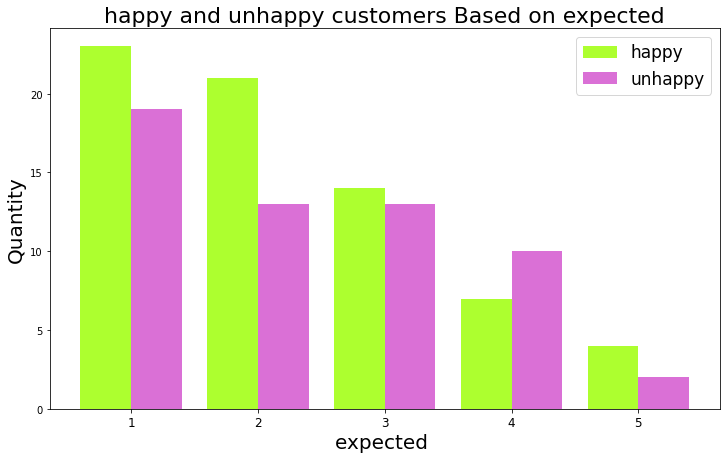

[23, 21, 14, 7, 4]
[19, 13, 13, 10, 2]


In [29]:
# happy and unhappy customers Based on expected
expected = data['expected'].value_counts()
m_height = expected.values.tolist() #Provides numerical values
expected.axes
expected_labels = expected.axes[0].tolist()
ind = np.arange(5)
happy_cc = [] #Poisonous color cap list
unhappy_cc = []    #Edible color cap list
for expected in expected_labels:
    size = len(data[data['expected'] == expected].index)
    happy = len(data[(data['expected'] == expected) & (data['Happy or Unhappy'] == 1)].index)
    happy_cc.append(happy)
    unhappy_cc.append(size-happy)
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
happy_bars = ax.bar(ind, happy_cc , width, color='#ADFF2F')
unhappy_bars = ax.bar(ind+width, unhappy_cc , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("expected ",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('happy and unhappy customers Based on expected',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('1','2','3','4','5'),
                  fontsize = 12)
ax.legend((happy_bars,unhappy_bars),('happy','unhappy'),fontsize=17)
plt.show()
print(happy_cc)
print(unhappy_cc)     
               


### I analysis the data based on 'expected' column. There is the most happy customer and unhappy customer in 1 category 

[55, 33, 17, 14, 7]


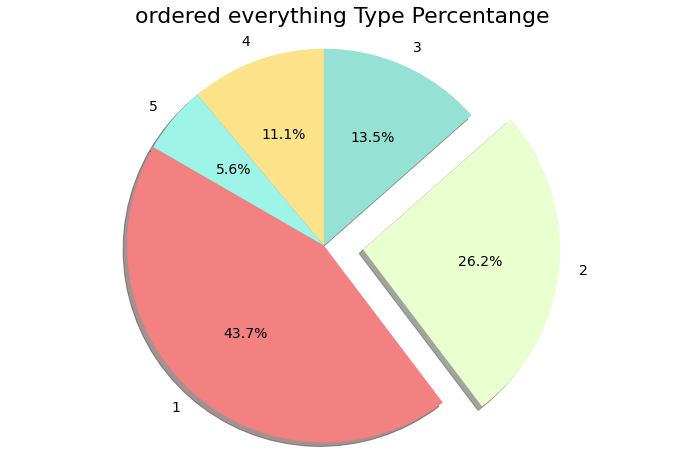

In [30]:
#Get the ordered everything types and its values for Single Pie chart
everythings = data['ordered everything'].value_counts()
pop_size = everythings.values.tolist() #Provides numerical values
pop_types = everythings.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = '1', '2', '3', '4', '5'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#9EF4E6']
explode = (0, 0.2, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('ordered everything Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

### This pie graph shows that 'ordered everything' column has the most number in 1 category and in 5 category has the smallest number 

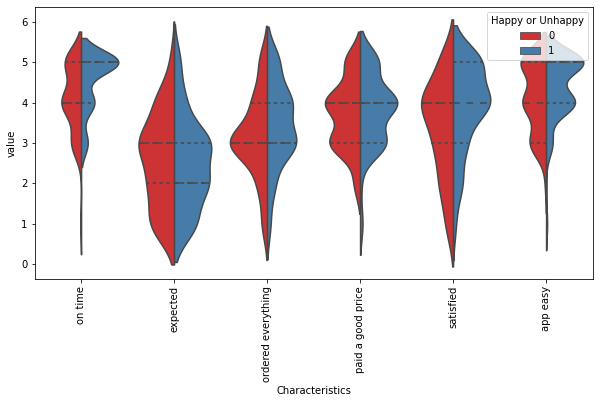

In [31]:
df_div = pd.melt(data, 'Happy or Unhappy', var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue='Happy or Unhappy', split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = data.drop(['Happy or Unhappy'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

### The violin plot shows the distribution of classfication

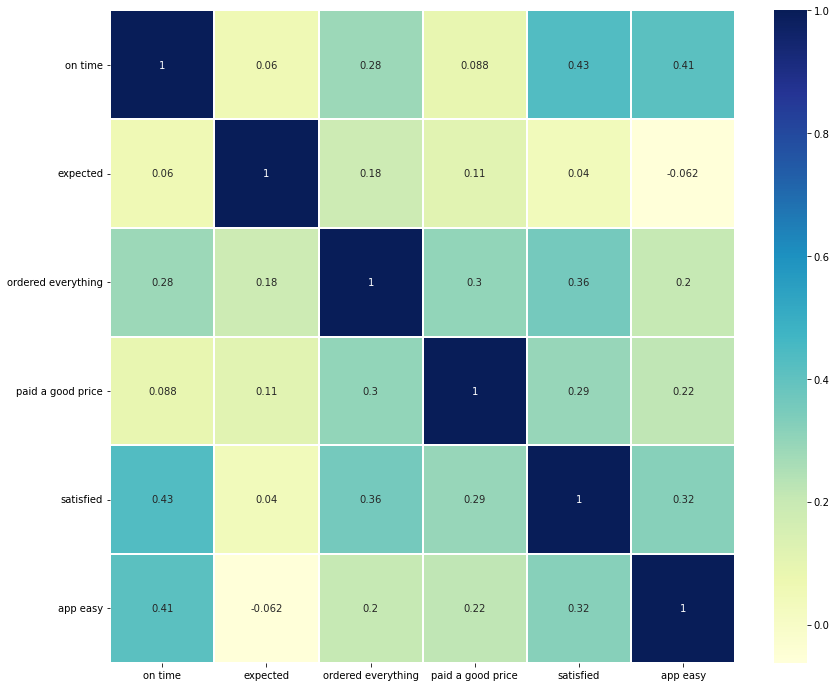

In [453]:
# Variables correlation
plt.figure(figsize=(14,12))
sns.heatmap(df_no_class.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### This heat map has shown the correlation with every two columns. Satisfied has the most correlation with cloumn on time and satisfied has the smallest correlation with expected column

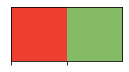

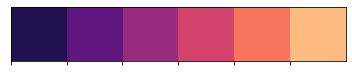

In [32]:
colors = ["#ED3E2F", "#85BB65"]
magma = sns.color_palette("magma")
sns.palplot(colors)
sns.palplot(magma)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12620\4014450488.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


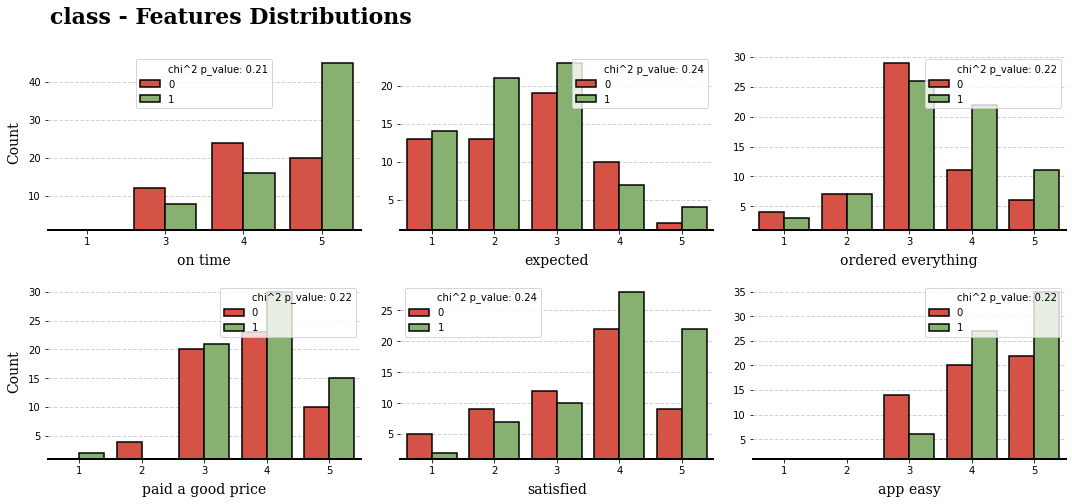

In [33]:
rows = 8
cols = 3
magma_palette = sns.color_palette("magma")
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=colors, hue="Happy or Unhappy", data=data, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    
    feature_data_0 = data[data["Happy or Unhappy"] == 0][feature].value_counts()
    feature_data_1 = data[data['Happy or Unhappy'] == 1][feature].value_counts()
    
    for idx_0 in feature_data_0.index:
        if idx_0 not in feature_data_1.index:
            feature_data_1[idx_0] = 0
    
    for idx_1 in feature_data_1.index:
        if idx_1 not in feature_data_0.index:
            feature_data_0[idx_1] = 0
    
    
    feature_data_0 = feature_data_0.sort_index()
    feature_data_1 = feature_data_1.sort_index()
    
    crosstable = pd.crosstab(feature_data_0.values, feature_data_1.values)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(1)
    ax.legend()

fig.text(x=0.05, y=1.01, s="class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="serif")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()
    
    

### I apply chi2 test to test the significane of every variance with the label. From the graph, we can see all the p value is smaller than 0.5,which means that H0 hypothesis is rejected, all the feature has the importance with the label.  

# Feature selection 

In [35]:
# chi value
chi_statics, p_values = chi2(df_no_class, data['Happy or Unhappy'])
chi2_result = pd.DataFrame({'features': df_no_class.columns, 'chi2_statics': chi_statics, 'p_values': p_values})
print(chi2_result.sort_values(by='chi2_statics', ascending=False)[['features', 'chi2_statics', 'p_values']].reset_index().drop('index', axis=1))

             features  chi2_statics  p_values
0           satisfied      2.273286  0.131621
1             on time      1.449041  0.228682
2  ordered everything      0.900104  0.342754
3            app easy      0.541070  0.461989
4   paid a good price      0.106194  0.744520
5            expected      0.036161  0.849183


In [38]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x = df_no_class
y = data['Happy or Unhappy']
clf = DecisionTreeClassifier()
clf = clf.fit(x,y)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  


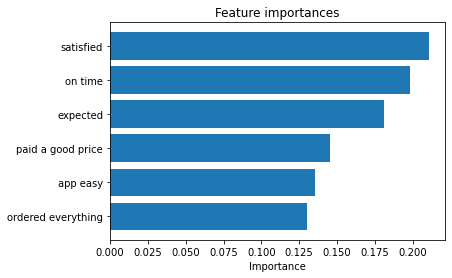

In [39]:
features_list = x.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()



### I use Decision Tree to do the feature importance. The Satisfied feature has the most importance anf ordered everthing has the smallest importance

# Model Training

In [40]:
class CONFIG:
    seed = 42
    folds = 5

In [41]:
#splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [42]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix,classification_report
# Kfold crossvalidation
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes, test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    fold_model = DecisionTreeClassifier().fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 0 16]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1      

In [43]:
# SVM(kenel= 'linear')
from sklearn.svm import SVC
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes,test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    svc = SVC(kernel = 'linear')
    fold_model = svc.fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))
    

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 0 16]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1      

In [44]:
# SVM(kernel='rbf')
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes,test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    svc = SVC(kernel = 'rbf')
    fold_model = svc.fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))
    

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 1 10]]
Classification Report               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.91      0.95        11

    accuracy                           0.96        26
   macro avg       0.97      0.95      0.96        26
weighted avg       0.96      0.96      0.96        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 1 15]]
Classification Report               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1      

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes,test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    rand = RandomForestClassifier(max_depth= 5, n_estimators=100 , min_samples_leaf=3).fit(train_data, train_labels)
    fold_model = rand.fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))
    

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 0 16]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1      

In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes,test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    nb = GaussianNB()
    fold_model = nb.fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 0 16]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1      

In [47]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
strategy = KFold(n_splits=CONFIG.folds, random_state=CONFIG.seed, shuffle=True)
folds = strategy.split(data,y)
for fold_idx, (train_indexes,test_indexes) in enumerate(folds):
    print(f"Fold: [{fold_idx+1}/{CONFIG.folds}]", end=": ")
    train_data, train_labels = data.iloc[train_indexes], y.iloc[train_indexes]
    test_data, test_labels = data.iloc[test_indexes], y.iloc[test_indexes]
    lg = LogisticRegression()
    fold_model = lg.fit(train_data, train_labels)
    predictions = fold_model.predict(test_data)
    cm = confusion_matrix(test_labels,predictions)
    print('confusion matrix:\n',cm)
    print("Classification Report",classification_report(test_labels,predictions))

Fold: [1/5]: confusion matrix:
 [[15  0]
 [ 0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Fold: [2/5]: confusion matrix:
 [[11  0]
 [ 0 14]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Fold: [3/5]: confusion matrix:
 [[ 9  0]
 [ 0 16]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1      

### I apply Decision Trees, SVM(kenel= 'linear'),Random Forest,Naive Bayes and LogisticRegression machine learning algorithmn to do classification with cross validation to avoid overfitting. As the data is small, there is no enough space to demonstrate the prior of them. 